In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.subplots 

In [12]:
## Create dataframe to compare one team over time (2 surveys)
#  in this case LTC-Americas journey November 2024 and December 2024 surveys
#  Name of team: Aprender a Cambiar (Lead to Change - LtC) - Viaje de Aprendizaje - #3 en las Americas
#  survey dates: 2024-11-19 and 2024-12-05
#  variables of interest

file_path = 'Individual.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

columns = ['Strong', 'Drained', 'Frustrated',
           'Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas',
           #'Country', 'Staff', 'Volunteer',
           'Well-being', 'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status'          
          ]

# Select rows by 'Team Name'
df = df[df['Team Name'].isin(['Aprender a Cambiar (Lead to Change - LtC) - Viaje de Aprendizaje - #3 en las Americas'])].copy()
Survey1_df = df[df['Survey Data'].isin(['2024-11-19 09:43:31.861000'])].copy()
Survey2_df = df[df['Survey Data'].isin(['2024-12-05 14:29:56.805000'])].copy()

#select variables to keep
Survey1_df = Survey1_df[columns]
Survey2_df = Survey2_df[columns]

#Create Survey variable
Survey1_df['Survey'] = 'baseline'
Survey2_df['Survey'] = 'endline'

# STEP 3  Append the two DataFrames
df = pd.concat([Survey1_df, Survey2_df], axis=0, ignore_index=False)

# Compute means for both years, excluding non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df = df.groupby('Survey')[numeric_columns].mean().reset_index()

df.info()

# create files with baseline (row 1) and endline (row 2) mean scores
df.to_excel('LTC_Americas2024_team_trend.xlsx', index=False)
df.to_csv('LTC_Americas2024_team_trend', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survey       2 non-null      object 
 1   Strong       2 non-null      float64
 2   Drained      2 non-null      float64
 3   Frustrated   2 non-null      float64
 4   Satisfied    2 non-null      float64
 5   Stay         2 non-null      float64
 6   Values       2 non-null      float64
 7   Meaning      2 non-null      float64
 8   Ideas        2 non-null      float64
 9   Well-being   2 non-null      float64
 10  Needs        2 non-null      float64
 11  Autonomy     2 non-null      float64
 12  Belonging    2 non-null      float64
 13  Competence   2 non-null      float64
 14  Leadership   2 non-null      float64
 15  Understands  2 non-null      float64
 16  Encourages   2 non-null      float64
 17  Listens      2 non-null      float64
 18  Management   2 non-null      float64
 19  Returns     

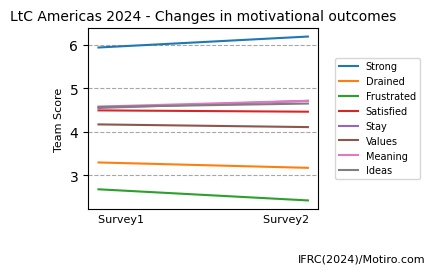

In [75]:
#Plot line graphs to show changes over time

df = pd.read_csv('LTC_Americas2024_team_trend')
df['Survey'].astype(str)

columns1 = ['Strong', 'Drained', 'Frustrated']
columns2 = ['Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas']

# Plotting
plt.figure(figsize=(4, 3))  # Increase the size slightly for clarity

for col in columns1 + columns2:
    plt.plot(df["Survey"], df[col], label=col)

plt.xticks([])
plt.legend(ncols=1, bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize='7')
plt.title('LtC Americas 2024 - Changes in motivational outcomes', size=10)
plt.xlabel('Survey1                                  Survey2', size=8)
plt.ylabel('Team Score', size=8)
plt.grid(True, which="both", ls="--", c='0.65')
plt.text(0.95, 1, "IFRC(2024)/Motiro.com", fontdict={'size': 8})
plt.tight_layout()
plt.show()


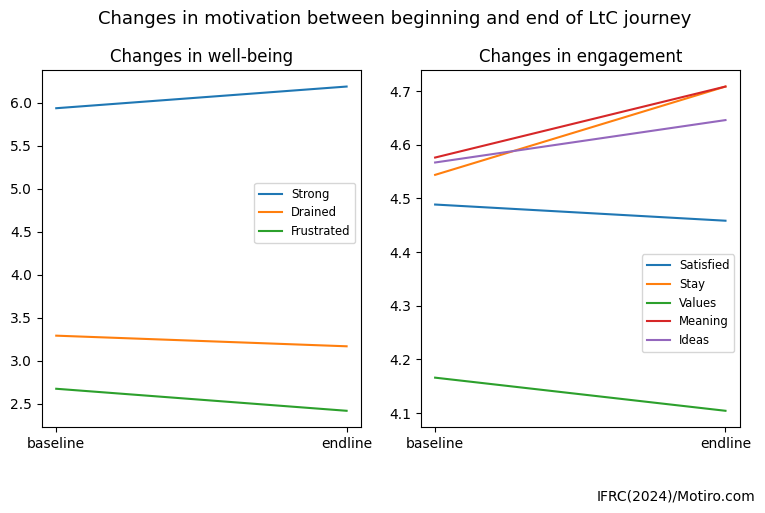

In [70]:

df = pd.read_csv('LTC_Americas2024_team_trend')
df['Survey'].astype(str)

columns1 = ['Strong', 'Drained', 'Frustrated']
columns2 = ['Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas']

# Create a 1x2 grid of subplots sharing the same x-axis and y-axis
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), sharey=False)

# Plotting for ax1
for col in columns1:
    ax1.plot(df['Survey'], df[col], label=col)
#ax1.set_xticks([])  # remove x ticks for ax1
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.5), fontsize='small')
ax1.set_ylabel('')
ax1.set_title('Changes in well-being')  # optional title for ax1
#ax1.set_xlabel('Beginning                  end of journey')
# Plotting for ax2
for col in columns2:
    ax2.plot(df['Survey'], df[col], label=col)
#ax2.set_xticks([])  # remove x ticks for ax2
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.5), fontsize='small')
ax2.set_title('Changes in engagement')  # optional title for ax2
#ax2.set_xlabel('Beginning                  end of journey')

plt.suptitle('Changes in motivation between beginning and end of LtC journey', size=13)
plt.text(0.95, 0, "IFRC(2024)/Motiro.com", fontdict={'size': 10}, transform=plt.gcf().transFigure, ha='right')
plt.tight_layout()
plt.savefig('LtC_changes_1by2.png')
plt.show()


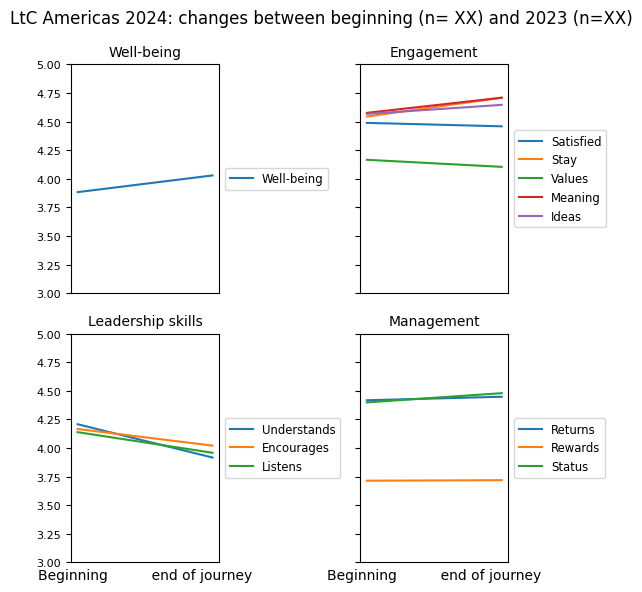

In [21]:

df = pd.read_csv('LTC_Americas2024_team_trend')
df['Survey'].astype(str)

#columns1 = ['Strong', 'Drained', 'Frustrated']
columns1 = ['Well-being']
columns2 = ['Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas']
columns3 = ['Understands', 'Encourages', 'Listens']
columns4 = ['Returns', 'Rewards', 'Status']

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharex=True, sharey=True)

# Plotting for ax1
for col in columns1:
    ax1.plot(df['Survey'], df[col], label=col)
ax1.set_xticks([])  # remove x ticks for ax1
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
ax1.set_ylabel('')
ax1.set_ybound(lower=2, upper=7)
ax1.set_title('Well-being', size=10)  # optional title for ax1
ax1.set_xlabel('')
ax1.tick_params(axis='y', which='both', labelsize=8)

# Plotting for ax2
for col in columns2:
    ax2.plot(df['Survey'], df[col], label=col)
ax2.set_xticks([])  # remove x ticks for ax2
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
ax2.set_ybound(lower=3, upper=5)
ax2.set_title('Engagement', size=10)  # optional title for ax2
ax2.set_xlabel('')

# Plotting for ax3
for col in columns3:
    ax3.plot(df['Survey'], df[col], label=col)
ax3.set_xticks([])  # remove x ticks for ax1
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
ax3.set_ybound(lower=3, upper=5)
ax3.set_ylabel('')
ax3.set_title('Leadership skills', size=10)  # optional title for ax3
ax3.set_xlabel('Beginning          end of journey')
ax3.tick_params(axis='y', which='both', labelsize=8)

# Plotting for ax4
for col in columns4:
    ax4.plot(df['Survey'], df[col], label=col)
ax4.set_xticks([])  # remove x ticks for ax4
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
ax4.set_ybound(lower=3, upper=5)
ax4.set_ylabel('')
ax4.set_title('Management', size=10)  # optional title for ax1
ax4.set_xlabel('Beginning          end of journey')


plt.suptitle('LtC Americas 2024: changes between beginning (n= XX) and 2023 (n=XX)', size=12)
plt.tight_layout()
plt.savefig('LtC_changes_2by2.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


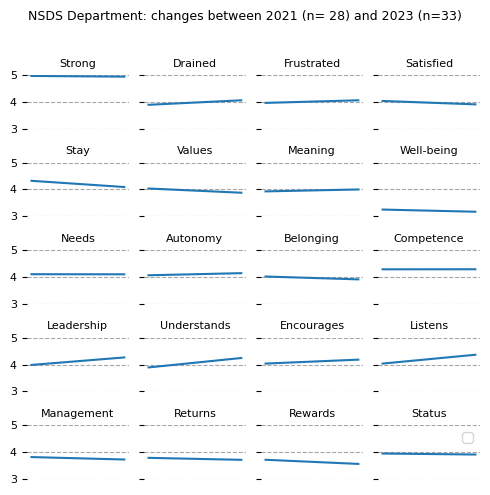

In [6]:
#Plot multiple line graphs to show changes over time

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/NSDS_team_trend.csv")
df['Year'].astype(str)

variables = [
    ('Year', 'Strong'),
    ('Year', 'Drained'),
    ('Year', 'Frustrated'),
    ('Year', 'Satisfied'),
    ('Year', 'Stay'),
    ('Year', 'Values'),
    ('Year', 'Meaning'),
    ('Year', 'Well-being'),
    ('Year', 'Needs'), 
    ('Year', 'Autonomy'),
    ('Year', 'Belonging'),
    ('Year', 'Competence'),
    ('Year', 'Leadership'),
    ('Year', 'Understands'),
    ('Year', 'Encourages'),
    ('Year', 'Listens'),
    ('Year', 'Management'),
    ('Year', 'Returns'),
    ('Year', 'Rewards'),
    ('Year', 'Status')    
]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(5, 5), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each variable and plot the corresponding lineplot
for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.lineplot(data=df, x=x_var, y=y_var, ax=ax)
    # Add a title to the subplot
    ax.set_title(f'{y_var}', size=8)
    ax.set_ylabel('', size=8)
    ax.set_ybound(lower=3, upper=5)
    ax.set_frame_on(False)
    ax.grid(visible=True, which='both', axis='y', ls="--", c='0.65')
    ax.tick_params(axis='y', which='both', labelsize=8)
    plt.tight_layout()
    plt.yticks(fontsize=6)
    plt.xticks([])
#plt.tight_layout()
plt.legend(loc='upper right')    

#ax.set_title('Changes in scores between 2021 and 2023', pad=3, y=1, fontdict={'size': 10})

# Increase the space at the top
plt.subplots_adjust(top=0.85)  # Adjust the value as needed

plt.suptitle('NSDS Department: changes between 2021 (n= 28) and 2023 (n=33)', size=9)
plt.savefig('NSDS_changes_4by5.png')
plt.show()